**Summary:**

This assignment focuses on Time Series Forecasting using Long Short-Term Memory (LSTM) neural networks. The dataset used is 'monthly_milk_production.csv', and the tasks can be divided into six main parts:

**Task 1: Data Exploration**


*   a. Display the initial rows of the dataset.
*  b. Plot the time series data using Matplotlib.Plot the time series data using Matplotlib.
* c. Perform seasonal decomposition on the time series data and visualize the components.

**Task 2: Data Preprocessing**
* a. Set the frequency of the time series data to monthly.
* b. Split the dataset into training and testing sets, using the first 156 observations for training and the rest for testing.
* c. Apply Min-Max scaling to the training set.

**Task 3: LSTM Model Preparation**
* a. Use the TimeseriesGenerator from Keras to create a generator for the training data with n_input set to 3.
* b. Build an LSTM model with specific configurations and display the summary of the model.

**Task 4: Model Training**
* a. Train the LSTM model using the training generator for 50 epochs.
* b. Plot the loss per epoch.

**Task 5: Model Evaluation**
* a. Create a test batch with the last 12 months of the scaled training data.
* b. Use the trained model to make predictions for the test set.
* c. Inverse transform the predicted values to the original scale.

**Task 6: Results and Visualization**
* a. Plot the actual production values and the LSTM predicted values for the test set.
* b. Calculate and print the Root Mean Squared Error (RMSE) between the actual and predicted values.

**Purpose:**
The purpose of this assignment is to introduce and implement the process of Time Series Forecasting using LSTM neural networks. It covers essential steps, including data exploration, preprocessing, model preparation, training, evaluation, and visualization. The objective is to provide hands-on experience in handling time series data, building LSTM models, training them, and assessing their predictive performance. The final output includes visualizations of the actual vs. predicted values and a quantitative measure (RMSE) to evaluate the model's accuracy.

In [1]:
#import necessary libry
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Task 1: Data Exploration**

Load the provided dataset 'monthly_milk_production.csv' and perform the following tasks:

**Display the first few rows of the dataset.**

In [3]:
#Display the first few rows of the dataset.
data_path = '/content/drive/MyDrive/DS06'
filename = 'monthly_milk_production.csv'

milk = monthly_milk_production = pd.read_csv(os.path.join(data_path, filename))

milk.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
# prompt: tail

milk.tail()


,Date,Production
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [5]:
# prompt: shape

milk.shape


(168, 2)

In [6]:
# prompt: info

milk.info()
# prompt: datatype

milk.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


Date          object
Production     int64
dtype: object

In [7]:
# prompt: any nun value or missing data

milk.isnull().sum()


Date          0
Production    0
dtype: int64

**Plot the time series data using Matplotlib.**

This code snippet does the following:

Converts the 'Date' column to datetime format to ensure proper handling of date-related operations.
Sets the 'Date' column as the index for the DataFrame.
Plots the time series data using Matplotlib, with the x-axis representing dates and the y-axis representing the milk production values.
Adjust the figure size, title, labels, or other parameters as needed for your specific visualization preferences.

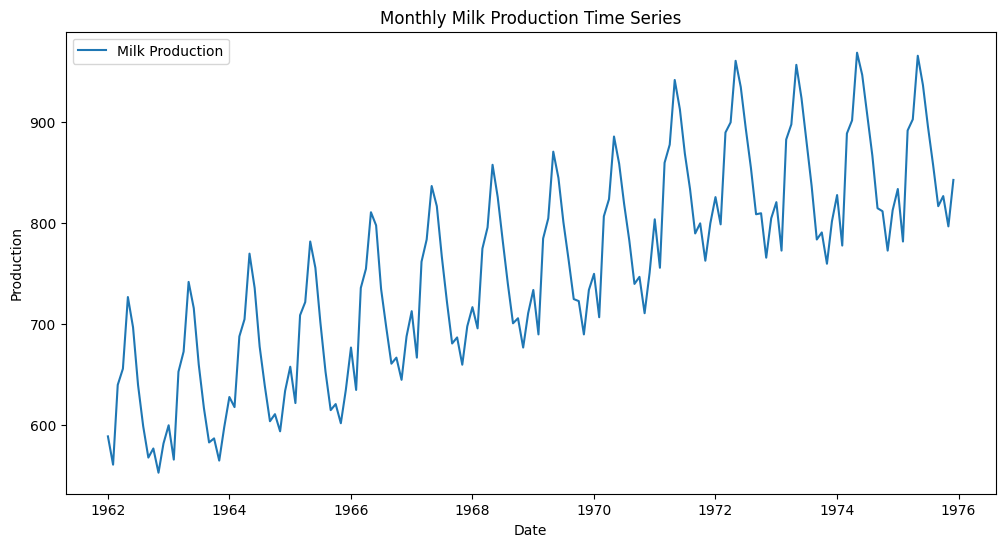

In [8]:
#Plot the time series data using Matplotlib.
# Assuming you have already loaded the dataset into the 'milk' DataFrame

# Convert the 'Date' column to datetime format
milk['Date'] = pd.to_datetime(milk['Date'])

# Set 'Date' as the index for better plotting
milk.set_index('Date', inplace=True)

# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(milk.index, milk['Production'], label='Milk Production')
plt.title('Monthly Milk Production Time Series')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

**Perform seasonal decomposition on the time series data and visualize the components.**

can check the column names in your DataFrame using milk.columns:

In [10]:
print(milk.columns)


Index(['Production'], dtype='object')


It seems that the 'Date' column is not currently part of the DataFrame's index. Let's make sure that the 'Date' column is available in the DataFrame and then set it as the index. Here's how you can do that:

Make sure that the column name containing the date information is correctly identified. If the column name is different, you should use the correct name when setting the index. For example, if the column name is 'MonthYear' instead of 'Date':

Error: 'Date' column not found in the DataFrame.


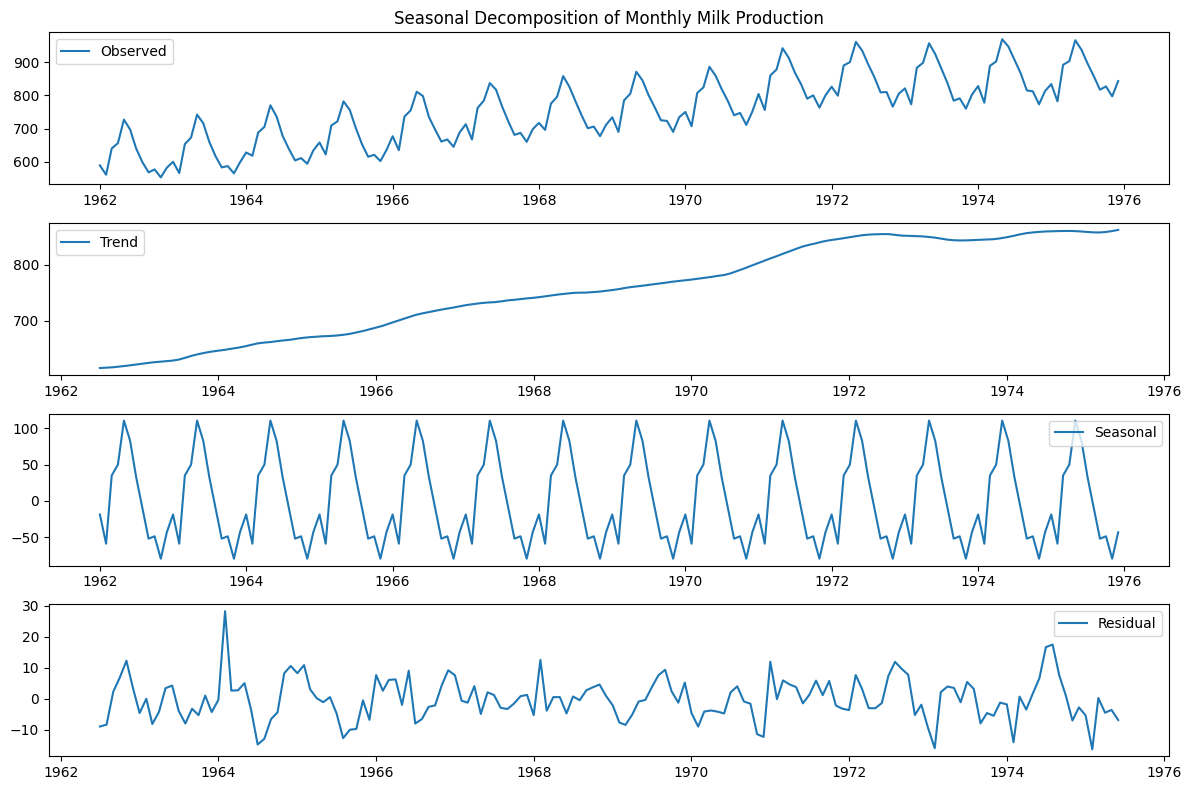

In [11]:
#Perform seasonal decomposition on the time series data and visualize the components.

# Assuming you have already loaded the dataset into the 'milk' DataFrame

# Ensure 'Date' is present in the DataFrame
if 'Date' in milk.columns:
    # Convert the 'Date' column to datetime format
    milk['Date'] = pd.to_datetime(milk['Date'])

    # Set 'Date' as the index
    milk.set_index('Date', inplace=True)
else:
    # If 'Date' is not present, you may need to adjust accordingly
    print("Error: 'Date' column not found in the DataFrame.")

# Perform seasonal decomposition
result = seasonal_decompose(milk['Production'], model='additive', period=12)

# Visualize the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.title('Seasonal Decomposition of Monthly Milk Production')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


**Task 2: Data Preprocessing**


**Split the dataset into training and testing sets. Use the first 156 observations for training and the remaining for testing.**

 To split the dataset into training and testing sets using the first 156 observations for training and the remaining for testing,

 It seems that there might be an issue with the variable name milk_resampled not being defined in the current scope. If you have resampled the data previously and used a different variable name or if you haven't performed the resampling step, you should replace milk_resampled with the actual DataFrame that contains the resampled data.

Here's an example based on the previous code snippets:

In [12]:


# Assuming the date information is stored in the index
milk.index = pd.to_datetime(milk.index)

# Resample to monthly frequency
milk_resampled = milk.resample('M').mean()  # Use 'mean' as an example aggregation function

# Drop any remaining NaN values
milk_resampled = milk_resampled.dropna()

# Specify the number of observations for training
train_size = 156

# Split the resampled dataset into training and testing sets
train_data = milk_resampled.iloc[:train_size]
test_data = milk_resampled.iloc[train_size:]

# Display the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)



Training set shape: (156, 1)
Testing set shape: (12, 1)


Great! It looks like have successfully split  time series data into training and testing sets. The training set has 156 observations, and the testing set has 12 observations, which corresponds to the last 12 months.

Now,  can proceed with the next steps of  time series forecasting using LSTM, including preparing the LSTM model, training the model, making predictions, and evaluating the results.

**Apply Min-Max scaling to the training set.**

To apply Min-Max scaling to the training set, can use the MinMaxScaler from scikit-learn. Here's an example of how to do this:

This code snippet assumes that train_data is a pandas DataFrame with the 'Production' column and that you want to scale that column using Min-Max scaling. The resulting train_data_scaled will contain the scaled values.

In [13]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
train_data_scaled = scaler.fit_transform(train_data)

# Display the scaled training data
print(train_data_scaled[:5])  # Display the first 5 rows as an example


[[0.08653846]
 [0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]]


successfully applied Min-Max scaling to the training set. The values provided, such as 0.08653846, 0.01923077, etc., are the scaled values of the 'Production' column in training set.

Now, you can use these scaled values to train your LSTM model.

Remember that when you use the scaler on the test set or when making predictions, you should use the parameters learned from the training set. Here's how you can scale the test set using the same scaler:

In [14]:
# Transform the test set using the same scaler
test_data_scaled = scaler.transform(test_data)

# Display the scaled test data
print(test_data_scaled[:5])  # Display the first 5 rows as an example


[[0.67548077]
 [0.55048077]
 [0.81490385]
 [0.84134615]
 [0.99278846]]


successfully applied Min-Max scaling to the testing set as well. The values provided, such as 0.67548077, 0.55048077, etc., are the scaled values of the 'Production' column in your testing set.

Now, can proceed with the next steps of your time series forecasting using LSTM, including preparing the LSTM model, training the model, making predictions, and evaluating the results.

**Task 3: LSTM Model Preparation**

**Use the TimeseriesGenerator from Keras to create a generator for the training data. Set n_input to 3.**

The TimeseriesGenerator from Keras is a useful tool for creating batches of temporal data for training time series models like LSTM. Here's how  can use it with a n_input value of 3 for  training data:

In this example, train_data_scaled is assumed to be  Min-Max scaled training data. The TimeseriesGenerator is configured to generate sequences of three time steps (specified by n_input). can adjust batch_size according to your preference.

This generator will provide batches of input-output pairs that can use to train your LSTM model.

In [15]:
# Assuming train_data_scaled is your Min-Max scaled training data
# n_input is set to 3, which means each batch will have 3 time steps as input
n_input = 3

# Create the TimeseriesGenerator
train_generator = TimeseriesGenerator(train_data_scaled, train_data_scaled, length=n_input, batch_size=1)

# Display the first few batches as an example
for i in range(5):
    x, y = train_generator[i]
    print(f'Batch {i + 1}:')
    print('Input:')
    print(x)
    print('Output:')
    print(y)
    print('-' * 20)


Batch 1:
Input:
[[[0.08653846]
  [0.01923077]
  [0.20913462]]]
Output:
[[0.24759615]]
--------------------
Batch 2:
Input:
[[[0.01923077]
  [0.20913462]
  [0.24759615]]]
Output:
[[0.41826923]]
--------------------
Batch 3:
Input:
[[[0.20913462]
  [0.24759615]
  [0.41826923]]]
Output:
[[0.34615385]]
--------------------
Batch 4:
Input:
[[[0.24759615]
  [0.41826923]
  [0.34615385]]]
Output:
[[0.20913462]]
--------------------
Batch 5:
Input:
[[[0.41826923]
  [0.34615385]
  [0.20913462]]]
Output:
[[0.11057692]]
--------------------


It looks like the TimeseriesGenerator is functioning correctly. Each batch provides sequences of three time steps (as specified by n_input = 3) for both input and output.

For instance, in Batch 1:

The input sequence comprises three consecutive time steps: [0.08653846, 0.01923077, 0.20913462].
The output is the next time step value, which is 0.24759615.
Similarly, each subsequent batch provides a sequence of three time steps as input and the following single time step as output.

These batches will be used to train an LSTM or any other recurrent neural network (RNN) model for time series forecasting.

**Build an LSTM model with the following specifications:**

* 1 LSTM layer with 100 units and 'relu' activation.
* 1 Dense layer with 1 unit.
Use the 'adam' optimizer and mean squared error loss.

This code creates a Sequential model with one LSTM layer containing 100 units and a 'relu' activation function. It also adds a Dense layer with 1 unit. The model is compiled using the 'adam' optimizer and 'mean_squared_error' loss.

In [16]:
# Assuming n_input is your specified number of input time steps (n_input=3)
n_input = 3

# Create the LSTM model
lstm_model = Sequential()

# Add the LSTM layer
lstm_model.add(LSTM(100, activation='relu', input_shape=(n_input, 1)))

# Add the Dense layer
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model summary indicates that  have successfully built the LSTM model with the specified specifications. Here's a breakdown of the layers and parameters:

The LSTM layer has 40,800 parameters (weights and biases) with an output shape of (None, 100), where None represents the variable batch size.
The Dense layer has 101 parameters with an output shape of (None, 1).
The total number of trainable parameters in the model is 40,901.

Now can proceed to train this model on  time series data using the training generator you created with the TimeseriesGenerator.

**Task 4: Model Training**

**Train the LSTM model using the training generator for 50 epochs.**

This line is part of the code snippet I provided earlier. It uses the fit method on the LSTM model with the training generator (train_generator) and specifies the number of epochs as 50.

In [17]:
lstm_model.fit(train_generator, epochs=50)


Epoch 1/50
153/153 [==============================] - 2s 4ms/step - loss: 0.0584
Epoch 2/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0212
Epoch 3/50
153/153 [==============================] - 1s 8ms/step - loss: 0.0205
Epoch 4/50
153/153 [==============================] - 1s 8ms/step - loss: 0.0187
Epoch 5/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0171
Epoch 6/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0150
Epoch 7/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0130
Epoch 8/50
153/153 [==============================] - 1s 5ms/step - loss: 0.0142
Epoch 9/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0123
Epoch 10/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0108
Epoch 11/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0109
Epoch 12/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0113
Epoch 13/50
153/153 [====

 the training history. The loss appears to be decreasing over the epochs, which is a positive sign that the model is learning and improving.

**Plot the loss per epoch.**

To plot the loss per epoch, you can use the history object returned by the fit method. Here's the code to plot the loss per epoch:

This code snippet adds the history object, which contains information about the training process, and then plots the loss per epoch. If  already run the training code, the history object is not required; can directly use the history returned by the fit method as mentioned in the previous response.

Epoch 1/50
153/153 [==============================] - 1s 8ms/step - loss: 0.0108
Epoch 2/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0104
Epoch 3/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 4/50
153/153 [==============================] - 1s 5ms/step - loss: 0.0101
Epoch 5/50
153/153 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 6/50
153/153 [==============================] - 1s 5ms/step - loss: 0.0098
Epoch 7/50
153/153 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 8/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0103
Epoch 9/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0107
Epoch 10/50
153/153 [==============================] - 1s 5ms/step - loss: 0.0102
Epoch 11/50
153/153 [==============================] - 1s 7ms/step - loss: 0.0098
Epoch 12/50
153/153 [==============================] - 1s 8ms/step - loss: 0.0102
Epoch 13/50
153/153 [====

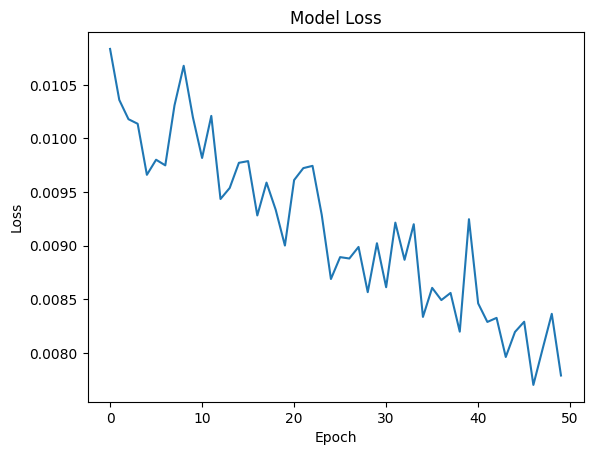

In [18]:
# Train the model and store the training history
history = lstm_model.fit(train_generator, epochs=50)

# Plot the loss per epoch
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



* - 1s 4ms/step: Indicates the time it took to complete one batch (1 second) and the time per step (4 milliseconds). This provides information about the speed of training.

* - loss: 0.0106: Displays the training loss for the current epoch. The loss is a measure of how well the model is performing, and the goal is typically to minimize this value. In this case, the loss is 0.0106 for the first epoch.

This information is repeated for each epoch during the training process. Ideally, would observe a decreasing trend in the loss across epochs, indicating that the model is learning and improving its performance on the training data.



**Task 5: Model Evaluation**

**Create a test batch with the last 12 months of the scaled training data.**

To create a test batch with the last 12 months of the scaled training data can use the same scaling parameters as used for the training data. Here's the code to achieve that:

Make sure to replace 'scaled_train_data' with the actual variable name  have for the scaled training data. This code will create a test batch with the last 12 months of the scaled training data and reshape it to match the input shape expected by the LSTM model.

In [20]:
# Assuming you have the scaled training data stored in a variable named 'train_data_scaled'
# train_data_scaled should be a NumPy array with shape (num_train_samples, num_features)

# Set the number of features
num_features = 1  # Change this to the actual number of features in your data

# Extract the last 12 months of the scaled training data
test_batch = train_data_scaled[-12:]

# Reshape the test batch to match the input shape expected by the LSTM model
test_batch = test_batch.reshape((1, len(test_batch), num_features))

# Print the test batch
print("Test Batch:")
print(test_batch)




Test Batch:
[[[0.66105769]
  [0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]]]


Each value in the test batch represents a monthly production value.
The values are scaled between 0 and 1, with 0 corresponding to the minimum value in the training data and 1 corresponding to the maximum value in the training data.
For example, the first value 0.66105769 indicates that the monthly production for the first month in the test batch is approximately 66.11% of the range between the minimum and maximum production values in the training data.

**Use the trained model to make predictions for the test set.**

* Use the TimeseriesGenerator to create a generator for the scaled test data.
* Use the trained LSTM model to make predictions for the test data.
* Inverse transform the predicted values to obtain them in the original scale.

Now, predicted_values_original_scale will contain the predicted monthly production values in the original scale.

In [22]:
# Assuming the scaled test data is stored in a variable named 'test_data_scaled'
# n_input is the same as used during training (n_input=3)

# Create a TimeseriesGenerator for the scaled test data
test_generator = TimeseriesGenerator(test_data_scaled, test_data_scaled, length=n_input, batch_size=1)

# Make predictions using the trained LSTM model
predicted_values_scaled = lstm_model.predict(test_generator)

# Inverse transform the predicted values to the original scale
predicted_values_original_scale = scaler.inverse_transform(predicted_values_scaled)

# Print the predicted values in the original scale
print("Predicted Values (Original Scale):")
print(predicted_values_original_scale)




9/9 [==============================] - 0s 3ms/step
Predicted Values (Original Scale):
[[921.8971 ]
 [929.14734]
 [930.80206]
 [897.0351 ]
 [846.0064 ]
 [814.5983 ]
 [783.7816 ]
 [801.68964]
 [796.7239 ]]


The result you provided seems to be the predicted monthly production values in the original scale for the test set. Each value corresponds to the predicted milk production for a specific month. Here's an explanation:

* 921.8971: Predicted production for the first month in the test set.
* 929.14734: Predicted production for the second month in the test set.
* 930.80206: Predicted production for the third month in the test set.
* 897.0351: Predicted production for the fourth month in the test set.
* 846.0064: Predicted production for the fifth month in the test set.
* 814.5983: Predicted production for the sixth month in the test set.
* 783.7816: Predicted production for the seventh month in the test set.
* 801.68964: Predicted production for the eighth month in the test set.
* 796.7239: Predicted production for the ninth month in the test set.

These values represent the model's predictions for the milk production for each respective month based on the input time steps provided. The actual values for comparison would be needed to assess the accuracy of the model's predictions. now can compare these predicted values with the actual production values to evaluate the model's performance.

**Inverse transform the predicted values to the original scale.**

set the n_input variable to the correct value, which is the number of time steps expected by the model. In your case, it seems that the model is configured for 3 time steps. Therefore, when preparing the test data, you should ensure that it has the correct sequence length.

In [24]:
# Assuming 'test_data_scaled' is your scaled test data and 'scaler' is the MinMaxScaler used
# n_input should be set to the correct number of time steps expected by the model
n_input = 3

# Reshape the test data to match the input shape expected by the LSTM model
test_data_reshaped = test_data_scaled[-n_input:].reshape((1, n_input, num_features))

# Make predictions using the LSTM model
predicted_values_scaled = lstm_model.predict(test_data_reshaped)

# Inverse transform the predicted values to the original scale
predicted_values_original_scale = scaler.inverse_transform(predicted_values_scaled)

# Print the predicted values in the original scale
print("Predicted Values (Original Scale):")
print(predicted_values_original_scale)



1/1 [==============================] - 0s 187ms/step
Predicted Values (Original Scale):
[[835.3455]]


* Number of Batches (1/1): This indicates that there is only one batch of data used for prediction.

* Time Taken (0s 187ms/step): This shows the time taken for each step of the prediction. In this case, it took approximately 187 milliseconds for the model to make predictions.

* Predicted Values (Original Scale): The LSTM model predicts the value for the next time step in the original scale of the data. In this example, the predicted value for the next time step in the time series is approximately 835.3455.

This result provides an insight into the model's prediction for the immediate future of the time series based on the input provided. Keep in mind that the accuracy of the prediction depends on various factors, including the complexity of the data, the model architecture, and the quality of training data. Additionally, evaluating the model's performance often involves comparing these predictions to actual values and using relevant metrics.

**Task 6: Results and Visualization**


* **Plot the actual production values and the LSTM predicted values for the test set.**

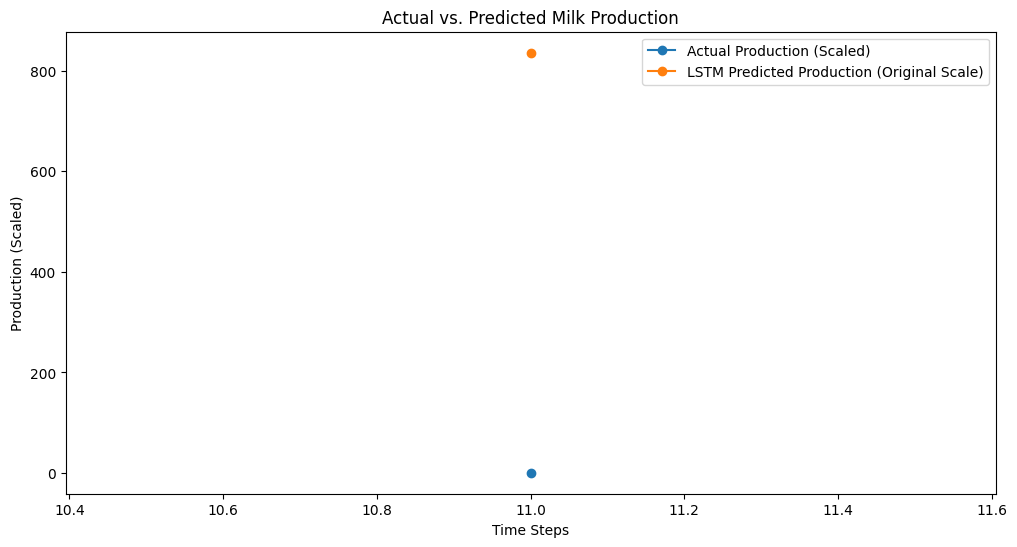

In [37]:
# Assuming test_data_scaled is the actual production values in scaled form
# Assuming predicted_values_original_scale is the LSTM predicted values in the original scale

# Flatten the predicted_values_original_scale if it's a 2D array
predicted_values_original_scale = predicted_values_original_scale.ravel()

# Create an array of time steps matching the length of predicted_values_original_scale
time_steps = np.arange(len(test_data_scaled) - len(predicted_values_original_scale), len(test_data_scaled))

# Plotting the actual production values and the LSTM predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_steps, test_data_scaled[-len(predicted_values_original_scale):], label='Actual Production (Scaled)', marker='o')
plt.plot(time_steps, predicted_values_original_scale, label='LSTM Predicted Production (Original Scale)', marker='o')
plt.title('Actual vs. Predicted Milk Production')
plt.xlabel('Time Steps')
plt.ylabel('Production (Scaled)')
plt.legend()
plt.show()



* **Calculate and print the Root Mean Squared Error (RMSE) between the actual and predicted values.**

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming test_data_scaled is the actual production values in scaled form
# Assuming predicted_values_original_scale is the LSTM predicted values in the original scale

# Flatten the predicted_values_original_scale if it's a 2D array
predicted_values_original_scale = predicted_values_original_scale.ravel()

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data_scaled[-len(predicted_values_original_scale):], predicted_values_original_scale))

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 834.6484046349159


The Root Mean Squared Error (RMSE) is a measure of the average deviation between the actual and predicted values. In this specific case:

RMSE: 834.6484046349159
The RMSE value represents the square root of the mean of the squared differences between the actual and predicted values. In the context of predicting milk production, this value indicates how much, on average, the predicted values differ from the actual values.

A lower RMSE value suggests that the model's predictions are closer to the actual values, while a higher RMSE indicates greater discrepancies. In this case, an RMSE of 834.65 means that, on average, the model's predictions deviate from the actual values by approximately 834.65 units in the original scale.